# Air Quality Data in India (2015 - 2020)
![](https://carbontracker.org/wp-content/uploads/2019/08/air-pollution-chimney-clouds-459728.jpg)

### Air quality index
- The air quality index **(AQI)** is an index for reporting **air quality** on a daily basis. It is a measure of how air   
  pollution   **affects** one's health within a short time period.
- So, Let's get started with the analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
city_df = pd.read_csv(r"C:/Users/vijay kumar yadav/Desktop/kaggle/Air quality kaggle question/city_day.csv")
city_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
city_df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [4]:
# Get info of data types of columns.
city_df['Date'] = city_df['Date'].apply(pd.to_datetime) # Changing data type of 'Date' column from object to date time.
city_df.dtypes

City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
dtype: object

In [5]:
# Checking for missing values

missing_data = city_df.isnull().sum()
percent_missing = (missing_data/len(city_df))*100
data_frame = pd.concat([missing_data,percent_missing.round(2)],axis=1)
data_frame.columns = ['No of missing values','% of missing values']
data_frame.sort_values('% of missing values',ascending=False).style.background_gradient('Blues')

,No of missing values,% of missing values
Xylene,18109,61.320000
PM10,11140,37.720000
NH3,10328,34.970000
Toluene,8041,27.230000
Benzene,5623,19.040000
AQI,4681,15.850000
AQI_Bucket,4681,15.850000
PM2.5,4598,15.570000
NOx,4185,14.170000
O3,4022,13.620000


## Calculate AQI
- Since our data set has missing **AQI** values. Although we have information of all essential pollutants.Thus, we need to   
  calculate these AQI values.
- Note for calculating **final** AQI we need data for either PM2.5 or PM10, Also data for any three Pollutants from all 
  pollutants.
- For more information please refer given link [Kaggle](https://www.kaggle.com/rohanrao/calculating-aqi-air-quality-index-tutorial)

In [6]:
# Delete rows with PM2.5 and PM10 both null.
city_df.dropna(axis=0, how="all", subset=['PM2.5','PM10'], inplace = True)
city_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
27,Ahmedabad,2015-01-28,73.24,NaN,5.72,21.11,25.84,NaN,5.72,36.52,62.42,0.03,0.01,1.41,NaN,NaN
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe


#### Code to store current data frame into .csv file in local machine
```
# Store this data frame to csv file in local machine.
city_df.to_csv("C:/Users/vijay kumar yadav/Desktop/kaggle/Air quality kaggle question/City_data_cleaned.csv")

# Now rest calculations of AQI we shall do in excel.
```

### Use AQI calculated and cleaned data set
- **MS-excel** is used to calculate sub-index, AQI, and AQI_Bucket columns.

In [7]:
city_cleaned_df = pd.read_csv("C:/Users/vijay kumar yadav/Desktop/kaggle/Air quality kaggle question/City_data_cleaned.csv")
city_cleaned_df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Xylene,PM2.5 (Subindex),PM10 (Sub index),NOx (Sub index),NH3 (Sub index),CO (Sub index),SO2 (Sub index),O3 (Sub index),AQI,AQI_Bucket
0,Ahmedabad,28-01-2015,73.24,NaN,5.72,21.11,25.84,NaN,5.72,36.52,...,1.41,144,0,32,0,147,46,62,147,Moderate
1,Ahmedabad,29-01-2015,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,...,3.14,177,0,42,0,162,62,60,209,Poor
2,Ahmedabad,30-01-2015,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,...,4.81,166,0,-399,0,255,61,97,328,Very Poor
3,Ahmedabad,31-01-2015,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,...,7.67,215,0,-384,0,343,84,117,514,Severe
4,Ahmedabad,01-02-2015,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,...,25.87,312,0,105,0,456,94,104,782,Severe


In [8]:
# Create pivot table for Understanding the type of pollution in cities. 
pivot_df = city_cleaned_df.pivot_table(index = ['AQI_Bucket'], columns = ['City'],aggfunc = 'count')['AQI']
pivot_df.head()

City,Ahmedabad,Aizawl,Amaravati,Amritsar,Bengaluru,Bhopal,Brajrajnagar,Chandigarh,Chennai,Coimbatore,...,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam
AQI_Bucket,,,,,,,,,,,,,,,,,,,,,
Good,1.0,83.0,170.0,95.0,114.0,2.0,19.0,48.0,13.0,66.0,...,29.0,NaN,120.0,13.0,27.0,NaN,115.0,29.0,127.0,59.0
Moderate,213.0,NaN,234.0,471.0,636.0,165.0,459.0,76.0,807.0,13.0,...,496.0,76.0,154.0,588.0,290.0,532.0,15.0,354.0,156.0,606.0
Poor,248.0,1.0,52.0,69.0,36.0,31.0,128.0,20.0,113.0,NaN,...,133.0,3.0,119.0,353.0,35.0,246.0,NaN,90.0,4.0,76.0
Satisfactory,44.0,28.0,419.0,486.0,1134.0,78.0,122.0,157.0,938.0,301.0,...,179.0,83.0,287.0,368.0,431.0,193.0,118.0,167.0,790.0,478.0
Severe,646.0,NaN,4.0,8.0,NaN,NaN,2.0,NaN,6.0,NaN,...,22.0,NaN,13.0,111.0,NaN,179.0,3.0,29.0,NaN,NaN


In [9]:
pivot_df.replace(np.nan,0,inplace=True)
pivot_df

City,Ahmedabad,Aizawl,Amaravati,Amritsar,Bengaluru,Bhopal,Brajrajnagar,Chandigarh,Chennai,Coimbatore,...,Jorapokhar,Kochi,Kolkata,Lucknow,Mumbai,Patna,Shillong,Talcher,Thiruvananthapuram,Visakhapatnam
AQI_Bucket,,,,,,,,,,,,,,,,,,,,,
Good,1.0,83.0,170.0,95.0,114.0,2.0,19.0,48.0,13.0,66.0,...,29.0,0.0,120.0,13.0,27.0,0.0,115.0,29.0,127.0,59.0
Moderate,213.0,0.0,234.0,471.0,636.0,165.0,459.0,76.0,807.0,13.0,...,496.0,76.0,154.0,588.0,290.0,532.0,15.0,354.0,156.0,606.0
Poor,248.0,1.0,52.0,69.0,36.0,31.0,128.0,20.0,113.0,0.0,...,133.0,3.0,119.0,353.0,35.0,246.0,0.0,90.0,4.0,76.0
Satisfactory,44.0,28.0,419.0,486.0,1134.0,78.0,122.0,157.0,938.0,301.0,...,179.0,83.0,287.0,368.0,431.0,193.0,118.0,167.0,790.0,478.0
Severe,646.0,0.0,4.0,8.0,0.0,0.0,2.0,0.0,6.0,0.0,...,22.0,0.0,13.0,111.0,0.0,179.0,3.0,29.0,0.0,0.0
Very Poor,230.0,1.0,17.0,48.0,5.0,4.0,45.0,3.0,15.0,0.0,...,37.0,0.0,66.0,474.0,1.0,387.0,0.0,102.0,0.0,18.0


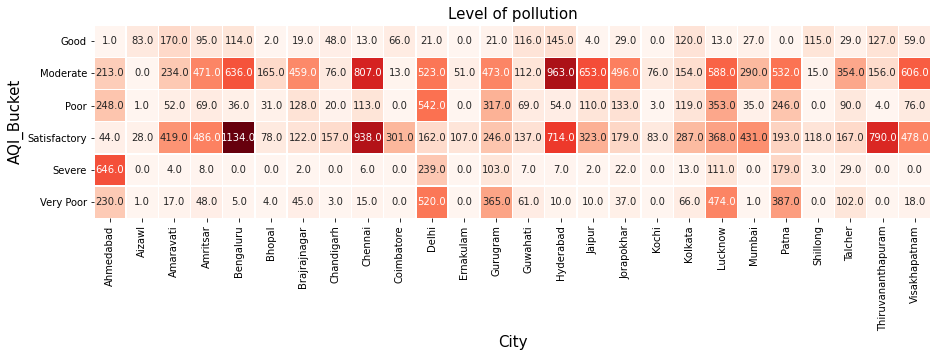

In [12]:
plt.subplots(figsize=(15,15))
plt.xlabel('Cities', size = 15)
plt.ylabel('AQI_Bucket', size = 15)
plt.title('Level of pollution', size = 15)
sns.heatmap(pivot_df,cmap='Reds',annot=True, fmt=".1f",linewidths=.5,square = True,cbar = False);
plt.show()

- From above heatmap we conclude:
- Pollution level status:
  - Good:
    - 0
  
  - Satisfactory:
    - Amaravati.
    - Amritsar.
    - Bengaluru.
    - Chandigarh.
    - Chennai.
    - Coimbatore.
    - Emakulam.
    - Guwahati.
    - Kochi.
    - Kolkata.
    - Mumbai.
    - Shillong.
    - Thiruvananthapuram.
    
  - Moderate:
    - Bhopal.
    - Brajrajnagar.
    - Gurugram.
    - Hyderabad.
    - Jaipur.
    - Jorapokhar.
    - Lucknow.
    - Patna.
    - Talcher.
    - Visakhapatnam.
  
  - Poor:
    - Delhi.
  
  - Very Poor:
    - 0
  - Severe:
    - Ahmedabad.

## Top 3 Cities using bar plot

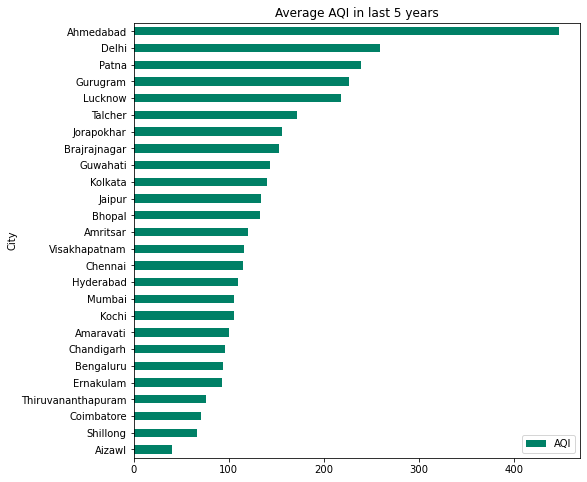

In [17]:
city_cleaned_df[['City','AQI']].groupby('City').mean().sort_values('AQI').plot(kind='barh',cmap='summer',figsize=(8,8))

plt.title('Average AQI in last 5 years')
plt.show()